# Машинное обучение, ФКН ВШЭ

## Практическое задание 2. Exploratory Data Analysis и линейная регрессия

### Общая информация
Дата выдачи: 26.09.2021

Мягкий дедлайн: 23:59MSK 11.10.2021

Жесткий дедлайн: 23:59MSK 14.10.2021

### О задании
В этом задании мы попытаемся научиться анализировать данные и выделять из них полезные признаки. Мы также научимся пользоваться `seaborn` и `sklearn`, а заодно привыкнем к основным понятиям машинного обучения.

### Оценивание и штрафы
Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 10 баллов. Проверяющий имеет право снизить оценку за неэффективную реализацию или неопрятные графики.

**Обратите внимание**, что в каждом разделе домашнего задания есть оцениваниемые задачи и есть вопросы. Вопросы дополняют задачи и направлены на то, чтобы проинтерпретировать или обосновать происходящее. Код без интерпретации не имеет смысла, поэтому отвечать на вопросы обязательно — за отсутствие ответов мы будем снижать баллы за задачи. Если вы ответите на вопросы, но не напишете корректный код к соответствующим оцениваемым задачам, то баллы за такое выставлены не будут.

Сдавать задание после указанного срока сдачи нельзя. При выставлении неполного балла за задание в связи с наличием ошибок на усмотрение проверяющего предусмотрена возможность исправить работу на указанных в ответном письме условиях.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов (подробнее о плагиате см. на странице курса). Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце вашей работы (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

### Формат сдачи
Задания сдаются через систему Anytask. Инвайт можно найти на странице курса. Присылать необходимо ноутбук с выполненным заданием. Сам ноутбук называйте в формате homework-practice-02-linregr-Username.ipynb, где Username — ваша фамилия.

Для удобства проверки самостоятельно посчитайте свою максимальную оценку (исходя из набора решенных задач) и укажите ниже.

Оценка: 5,25.

В этом ноутбуке используется библиотека `folium` для визуализации карт. Она работает в google colab!

In [406]:
!pip install folium

In [407]:
import folium

m = folium.Map(location=(55.7522200, 37.6155600), zoom_start=10)

m

Если вы всё сделали правильно, то выше должна открыться карта Москвы.

In [408]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

sns.set(style="darkgrid")

In [409]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

## Часть 0. Подготовка (1 балл)

**Задание 1 (1 балл)**. Мы будем работать с данными из соревнования [New York City Taxi Trip Duration](https://www.kaggle.com/c/nyc-taxi-trip-duration/overview), в котором нужно было предсказать длительность поездки на такси. Скачайте обучающую выборку из этого соревнования и загрузите ее:

In [410]:
data = pd.read_csv('train.csv')
data

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435
...,...,...,...,...,...,...,...,...,...,...,...
1458639,id2376096,2,2016-04-08 13:31:04,2016-04-08 13:44:02,4,-73.982201,40.745522,-73.994911,40.740170,N,778
1458640,id1049543,1,2016-01-10 07:35:15,2016-01-10 07:46:10,1,-74.000946,40.747379,-73.970184,40.796547,N,655
1458641,id2304944,2,2016-04-22 06:57:41,2016-04-22 07:10:25,1,-73.959129,40.768799,-74.004433,40.707371,N,764
1458642,id2714485,1,2016-01-05 15:56:26,2016-01-05 16:02:39,1,-73.982079,40.749062,-73.974632,40.757107,N,373


Обратите внимание на колонки `pickup_datetime` и `dropoff_datetime`. `dropoff_datetime` был добавлена организаторами только в обучающую выборку, то есть использовать эту колонку нельзя, давайте удалим ее. В `pickup_datetime` записаны дата и время начала поездки. Чтобы с ней было удобно работать, давайте преобразуем даты в `datetime`-объекты

In [411]:
data.drop('dropoff_datetime', axis=1, inplace=True)
data['pickup_datetime'] = pd.to_datetime(data['pickup_datetime'])

In [412]:
trip_duration = data['trip_duration']
data

,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,1,-73.973053,40.793209,-73.972923,40.782520,N,435
...,...,...,...,...,...,...,...,...,...,...
1458639,id2376096,2,2016-04-08 13:31:04,4,-73.982201,40.745522,-73.994911,40.740170,N,778
1458640,id1049543,1,2016-01-10 07:35:15,1,-74.000946,40.747379,-73.970184,40.796547,N,655
1458641,id2304944,2,2016-04-22 06:57:41,1,-73.959129,40.768799,-74.004433,40.707371,N,764
1458642,id2714485,1,2016-01-05 15:56:26,1,-73.982079,40.749062,-73.974632,40.757107,N,373


В колонке `trip_duration` записано целевое значение, которое мы хотим предсказывать. Давайте посмотрим на распределение таргета в обучающей выборке. Для этого нарисуйте его гистограмму:

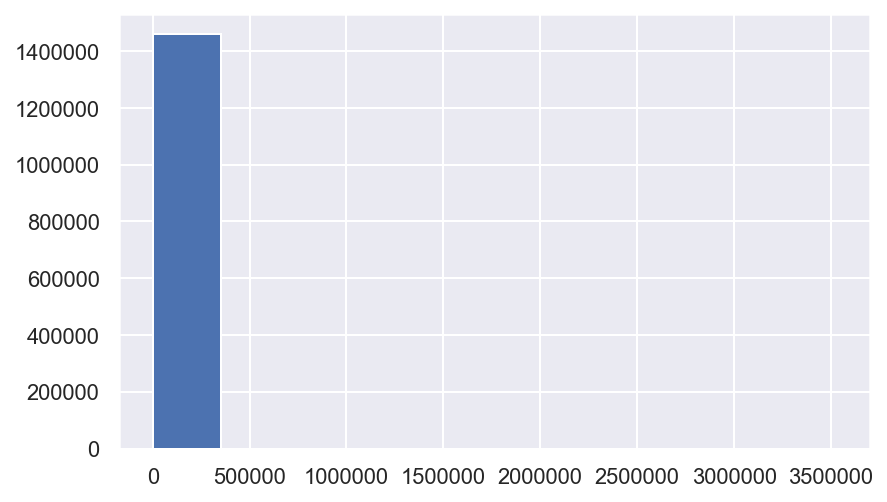

In [413]:
plt.hist(data['trip_duration'])
plt.show()

**Вопрос**: Что можно сказать о целевой переменной по гистограмме её значений?

**Ответ**: выделяется ось х, гистограмма не инфармативна, ее основные значения находятся в начале оси х.

В соревновании в качестве метрики качества использовалось RMSLE:
$$\text{RMSLE}(X, y, a) = \sqrt{\frac{1}{\ell}\sum_{i=1}^{\ell} \big(\log{(y_i + 1)} - \log{(a(x_i) + 1)}\big)^2}$$

**Вопрос**: Как вы думаете, почему авторы соревнования выбрали именно RMSLE, а не RMSE?

**Ответ**: возможна проблема, когда целевое значение имеет разброс значений. MSLE хорошо подходит для задач с неотрицательной целевой переменной. RMSLE нацелена на рассматривание небольших различий между небольшими фактическими и прогнозируемыми значениями, примерно так же, как большие различия между большими фактическими и прогнозируемыми значениями. Так же RMSLE есть log, который позволяет штрафовать модель за занижение сильнее, чем за завышение, так как log не симметричная функция. Завышенное время поездки не так сильно играет роль, как заниженное, потому что при заниженном времини клиент может неправильно распределить свое время и опаздать. 

На семинаре мы рассматривали несколько моделей линейной регрессии в `sklearn`, но каждая из них оптимизировала среднеквадратичную ошибку (MSE), а не RMSLE. Давайте проделаем следующий трюк: будем предсказывать не целевую переменную, а ее *логарифм*. Обозначим $\hat{y}_i = \log{(y_i + 1)}$ — модифицированный таргет, а $\hat{a}(x_i)$ — предсказание модели, которая обучалась на $\hat{y}_i$, то есть логарифм таргета. Чтобы предсказать исходное значение, мы можем просто взять экспоненту от нашего предсказания: $a(x_i) = \exp(\hat{a}(x_i)) - 1$.

**Вопрос**: Покажите, что оптимизация RMSLE для модели $a$ эквивалентна оптимизации MSE для модели $\hat{a}$.

**Доказательство**: $\log{(x + 1)}$ и $\sqrt{(x)}$ дифференцируемые монотонные функции. $a(x_i) = \exp(\hat{a}(x_i)) - 1 \Rightarrow \exp(\hat{a}(x_i)) = a(x_i) + 1 \Rightarrow \exp(\hat{a}(x_i)) = \log{(a(x_i) + 1)} \Rightarrow \text{RMSLE}(X, y, a) = \sqrt{\frac{1}{\ell}\sum_{i=1}^{\ell} \big(\log{(y_i + 1)} - \log{(a(x_i) + 1)}\big)^2} =  \sqrt{\frac{1}{\ell}\sum_{i=1}^{\ell} \big(\hat{y}_i - \hat{a}(x_i)\big)^2} = \sqrt{\text{MSE}(X, \hat{y}, \hat{a})}$

Итак, мы смогли свести задачу оптимизации RMSLE к задаче оптимизации MSE, которую мы умеем решать! Кроме того, у логарифмирования таргета есть еще одно полезное свойство. Чтобы его увидеть, добавьте к нашей выборке колонку `log_trip_duration` (воспользуйтесь `np.log1p`) и нарисуйте гистограмму модифицированного таргета по обучающей выборке. Удалите колонку со старым таргетом.

In [414]:
data['log_trip_duration'] = np.log1p(data['trip_duration'])
data.drop('trip_duration', axis=1, inplace=True)

In [415]:
data

,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,log_trip_duration
0,id2875421,2,2016-03-14 17:24:55,1,-73.982155,40.767937,-73.964630,40.765602,N,6.122493
1,id2377394,1,2016-06-12 00:43:35,1,-73.980415,40.738564,-73.999481,40.731152,N,6.498282
2,id3858529,2,2016-01-19 11:35:24,1,-73.979027,40.763939,-74.005333,40.710087,N,7.661527
3,id3504673,2,2016-04-06 19:32:31,1,-74.010040,40.719971,-74.012268,40.706718,N,6.063785
4,id2181028,2,2016-03-26 13:30:55,1,-73.973053,40.793209,-73.972923,40.782520,N,6.077642
...,...,...,...,...,...,...,...,...,...,...
1458639,id2376096,2,2016-04-08 13:31:04,4,-73.982201,40.745522,-73.994911,40.740170,N,6.658011
1458640,id1049543,1,2016-01-10 07:35:15,1,-74.000946,40.747379,-73.970184,40.796547,N,6.486161
1458641,id2304944,2,2016-04-22 06:57:41,1,-73.959129,40.768799,-74.004433,40.707371,N,6.639876
1458642,id2714485,1,2016-01-05 15:56:26,1,-73.982079,40.749062,-73.974632,40.757107,N,5.924256


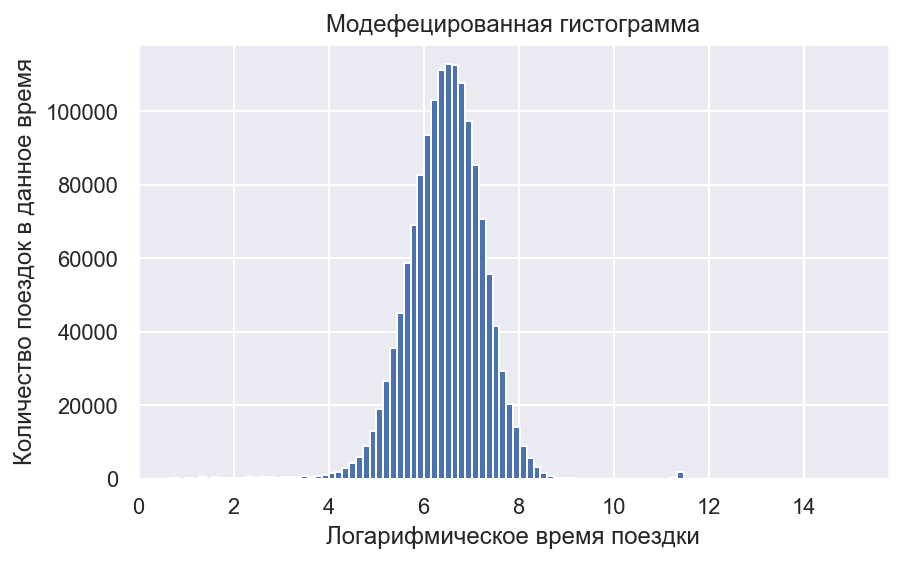

In [416]:
plt.xlabel('Логарифмическое время поездки')
plt.ylabel('Количество поездок в данное время')
plt.title('Модефецированная гистограмма')
plt.hist(data['log_trip_duration'], bins=100)
plt.show()

Чтобы иметь некоторую точку отсчета, давайте посчитаем значение метрики при наилучшем константном предсказании:

In [417]:
#https://www.kaggle.com/carlolepelaars/understanding-the-metric-rmsle
best_const = np.mean((data['log_trip_duration']))
arr = np.tile(best_const, [len(data['log_trip_duration'])])
mean_squared_error(data['log_trip_duration'], arr)

0.6332327625405546

## Часть 1. Изучаем `pickup_datetime` (2 балла)

**Задание 2 (0.25 баллов)**. Для начала давайте посмотрим, сколько всего было поездок в каждый из дней. Постройте график зависимости количества поездок от дня в году (например, можно воспользоваться `sns.countplot`):

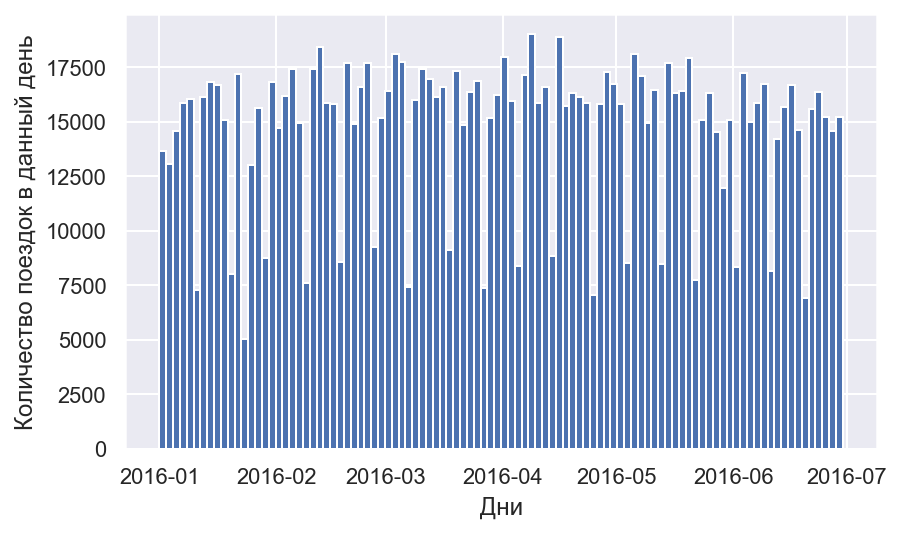

In [418]:
plt.xlabel('Дни')
plt.ylabel('Количество поездок в данный день')
plt.hist(data['pickup_datetime'].dt.date, bins=100)
plt.show()

**Вопрос**: Вы, вероятно, заметили, что на графике есть 2 периода с аномально маленькими количествами поездок. Вычислите, в какие даты происходили эти скачки вниз и найдите информацию о том, что происходило в эти дни в Нью-Йорке.

Нарисуйте графики зависимости количества поездок от дня недели и от часов в сутках (воспользуйтесь `sns.relplot`):

In [419]:
down = data.groupby(data['pickup_datetime'].dt.date).size()
down.sort_values().head(3)

pickup_datetime
2016-01-23    1648
2016-01-24    3383
2016-05-30    5570
dtype: int64

**Ответ**: 23 и 24 января была сильная буря, а 30 мая - memorial day

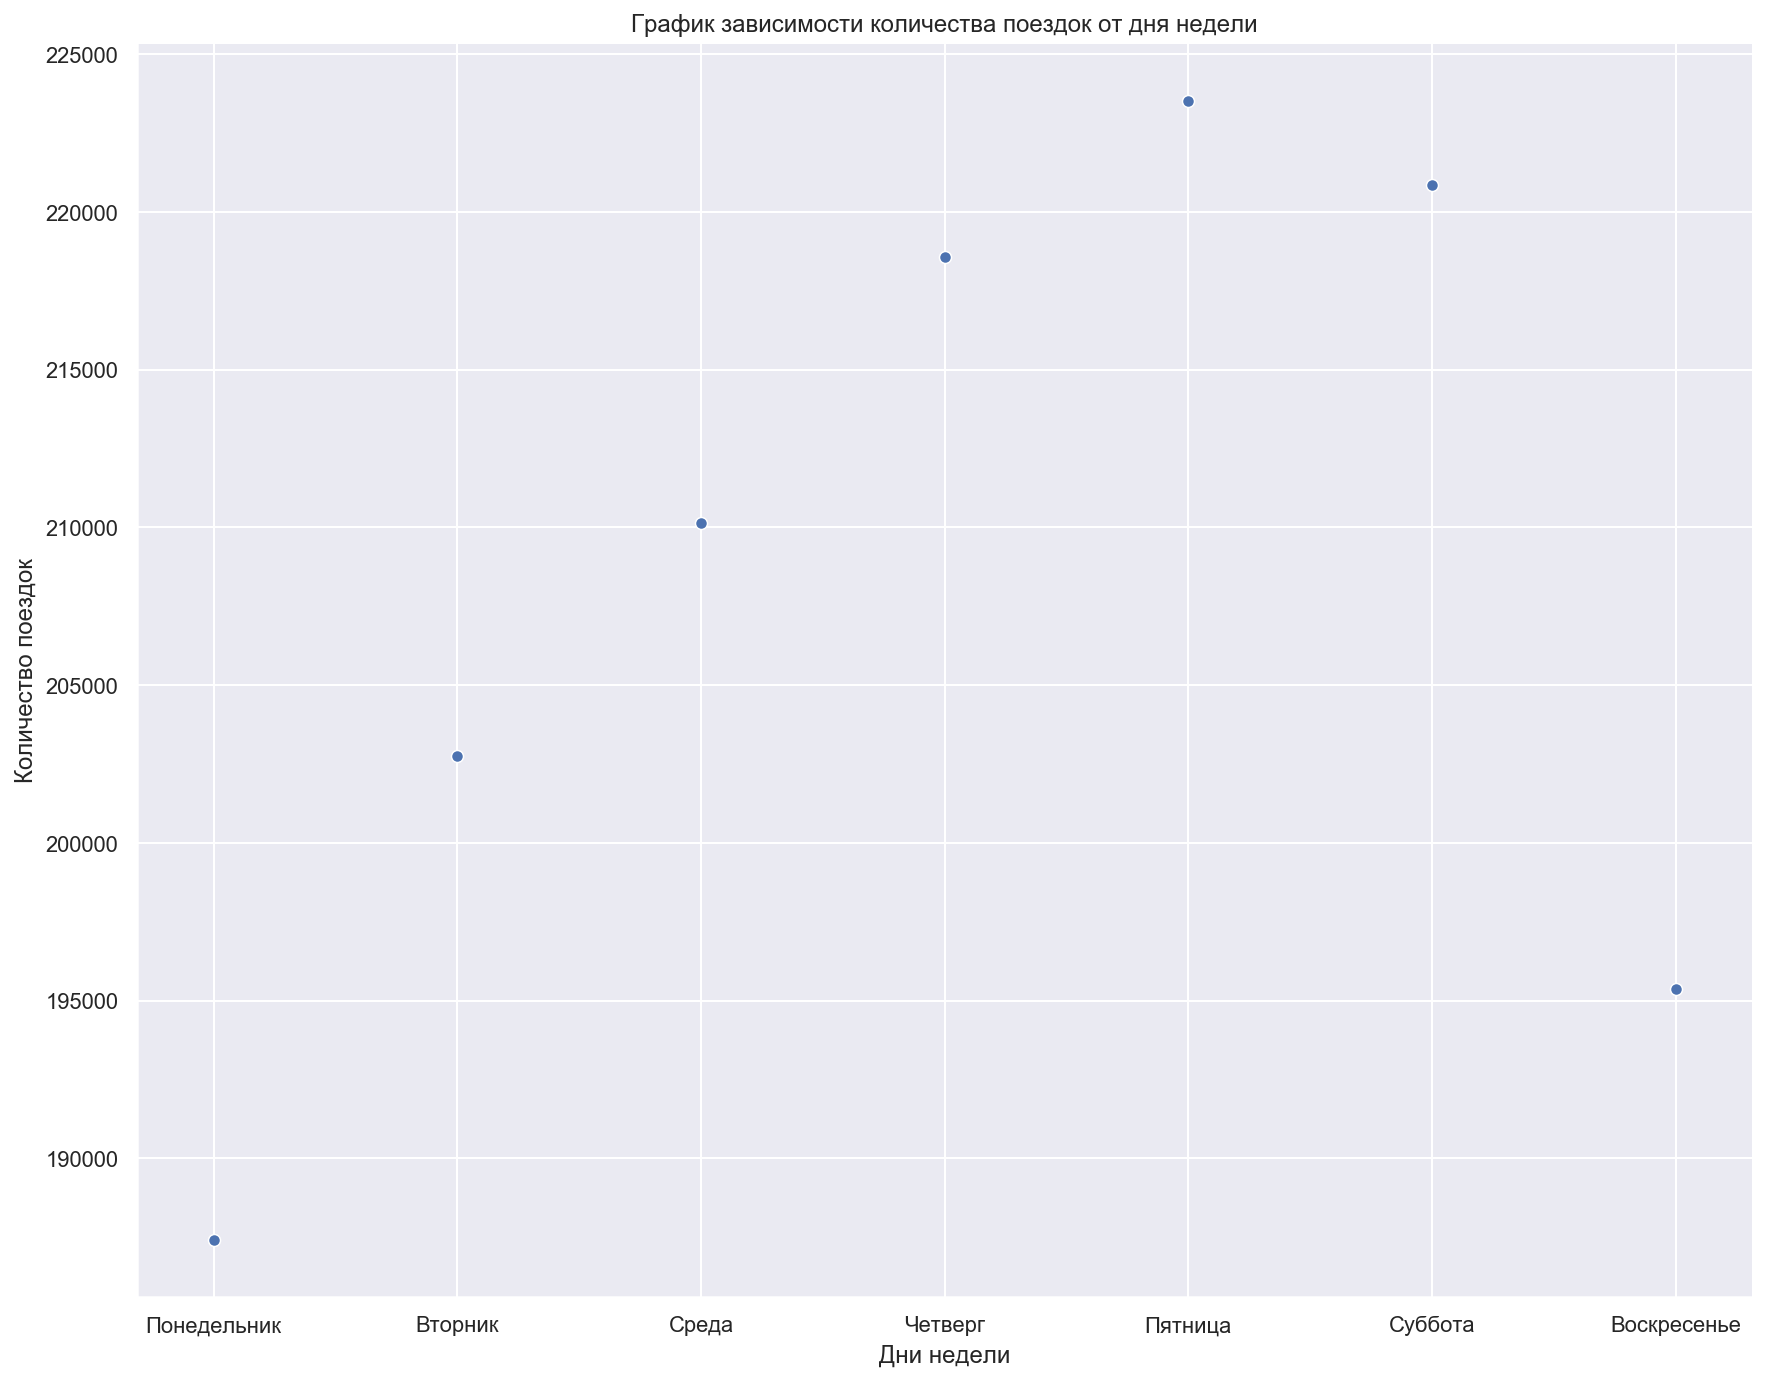

In [420]:
week = ['Понедельник', 'Вторник', 'Среда', 'Четверг', 'Пятница', 'Суббота', 'Воскресенье']
lx = data.groupby(data['pickup_datetime'].dt.weekday).size()
lx.index = week
plot = sns.relplot(data = lx)
plt.title('График зависимости количества поездок от дня недели')
plt.ylabel('Количество поездок')
plt.xlabel('Дни недели')
plot.fig.set_size_inches(15, 10)

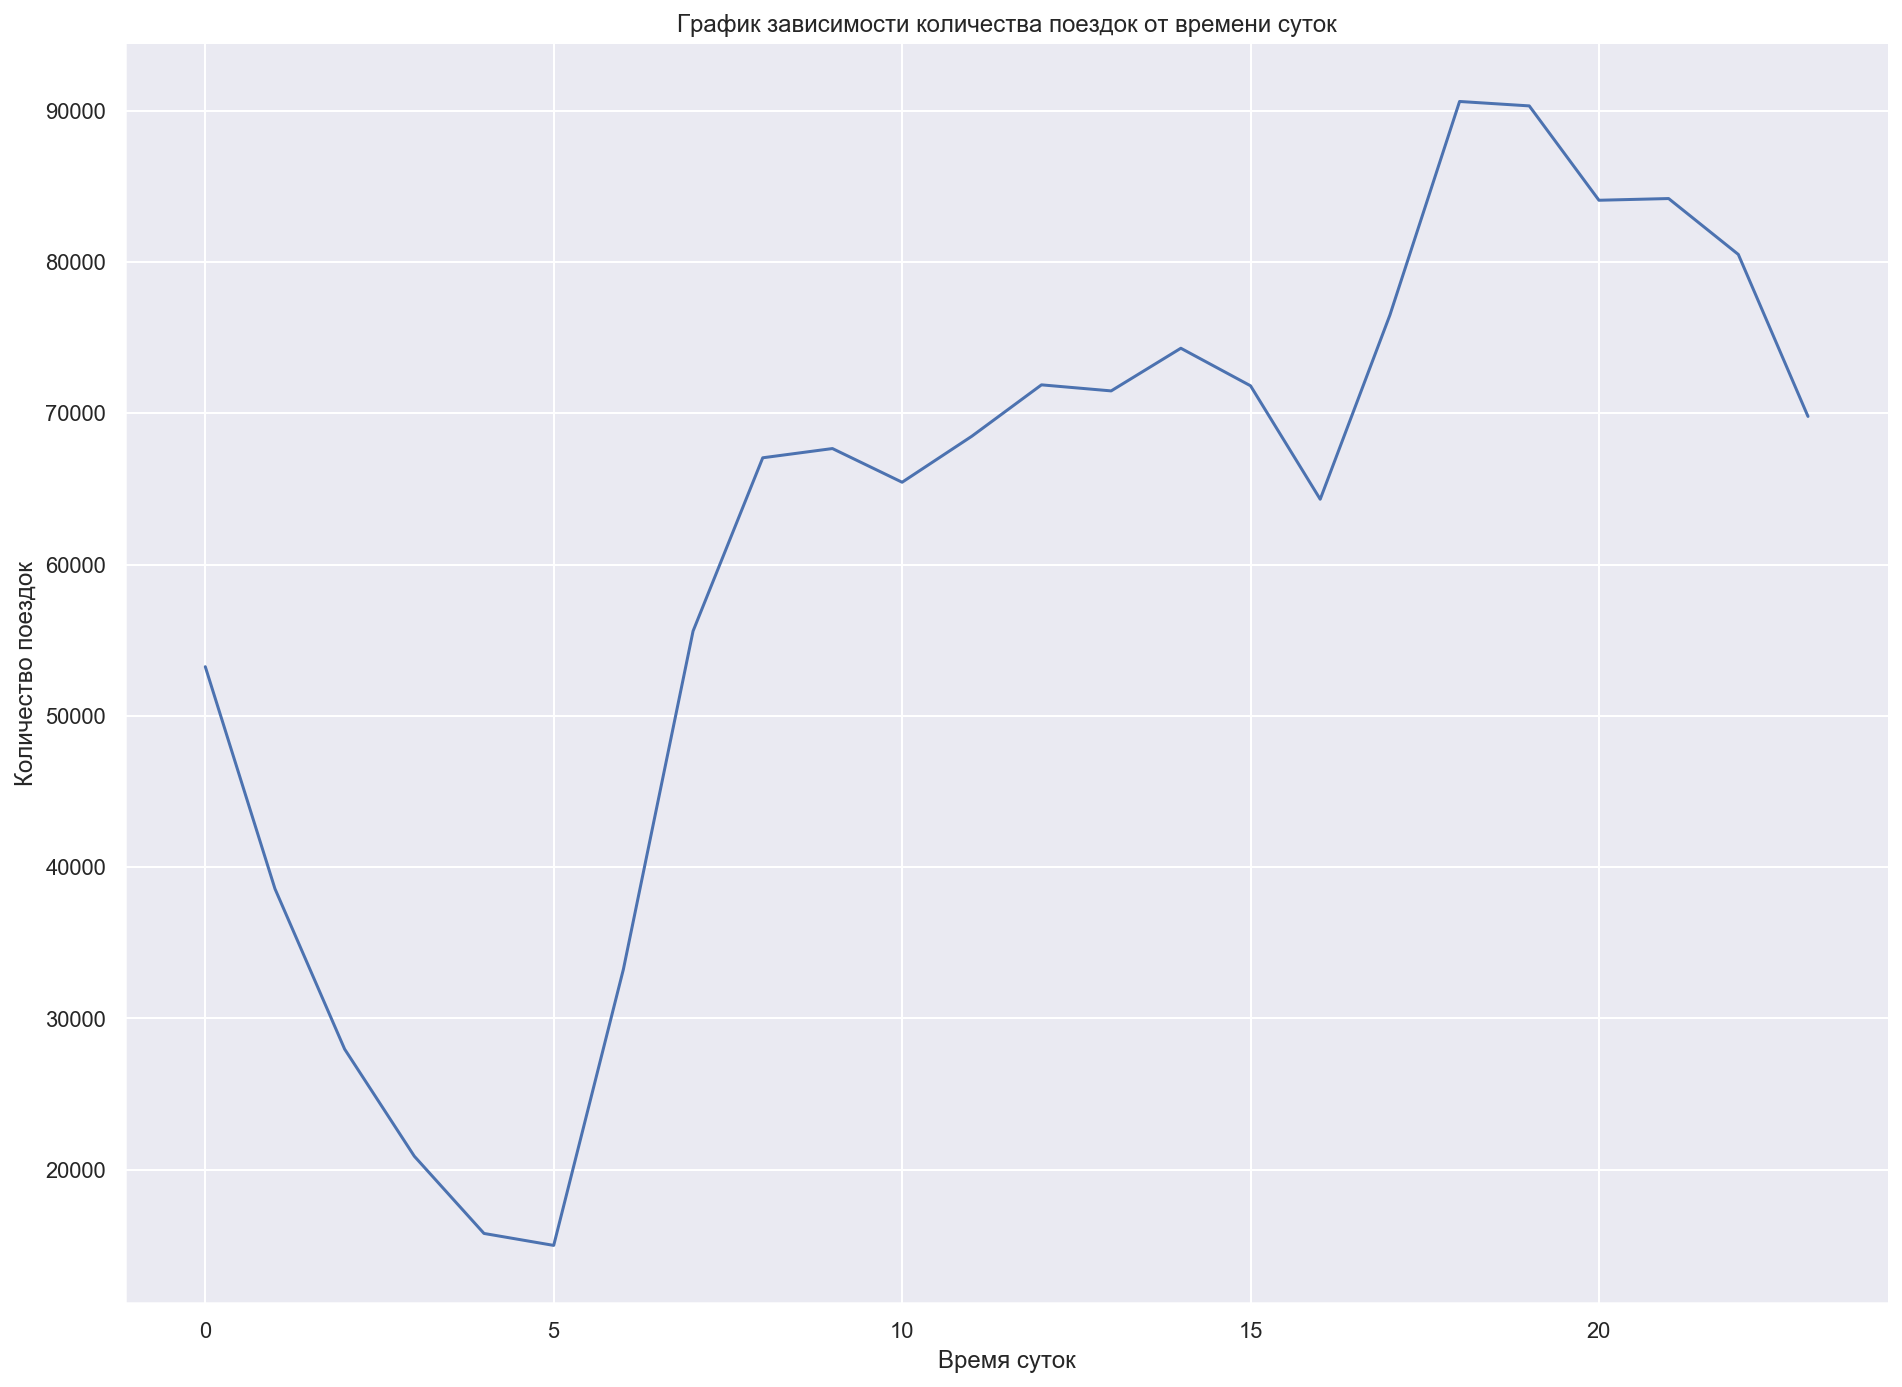

In [421]:
lx = data.groupby(data['pickup_datetime'].dt.hour).size()
plot = sns.relplot(data = lx, kind = 'line')
plt.title('График зависимости количества поездок от времени суток')
plt.ylabel('Количество поездок')
plt.xlabel('Время суток')
plot.fig.set_size_inches(15, 10)

**Задание 3 (0.5 баллов)**. Нарисуйте на одном графике зависимости количества поездок от часа в сутках для разных месяцев (разные кривые, соответствующие разным месяцам, окрашивайте в разные цвета, воспользуйтесь `hue` в `sns.relplot`). Аналогично нарисуйте зависимости количества поездок от часа в сутках для разных дней недели.

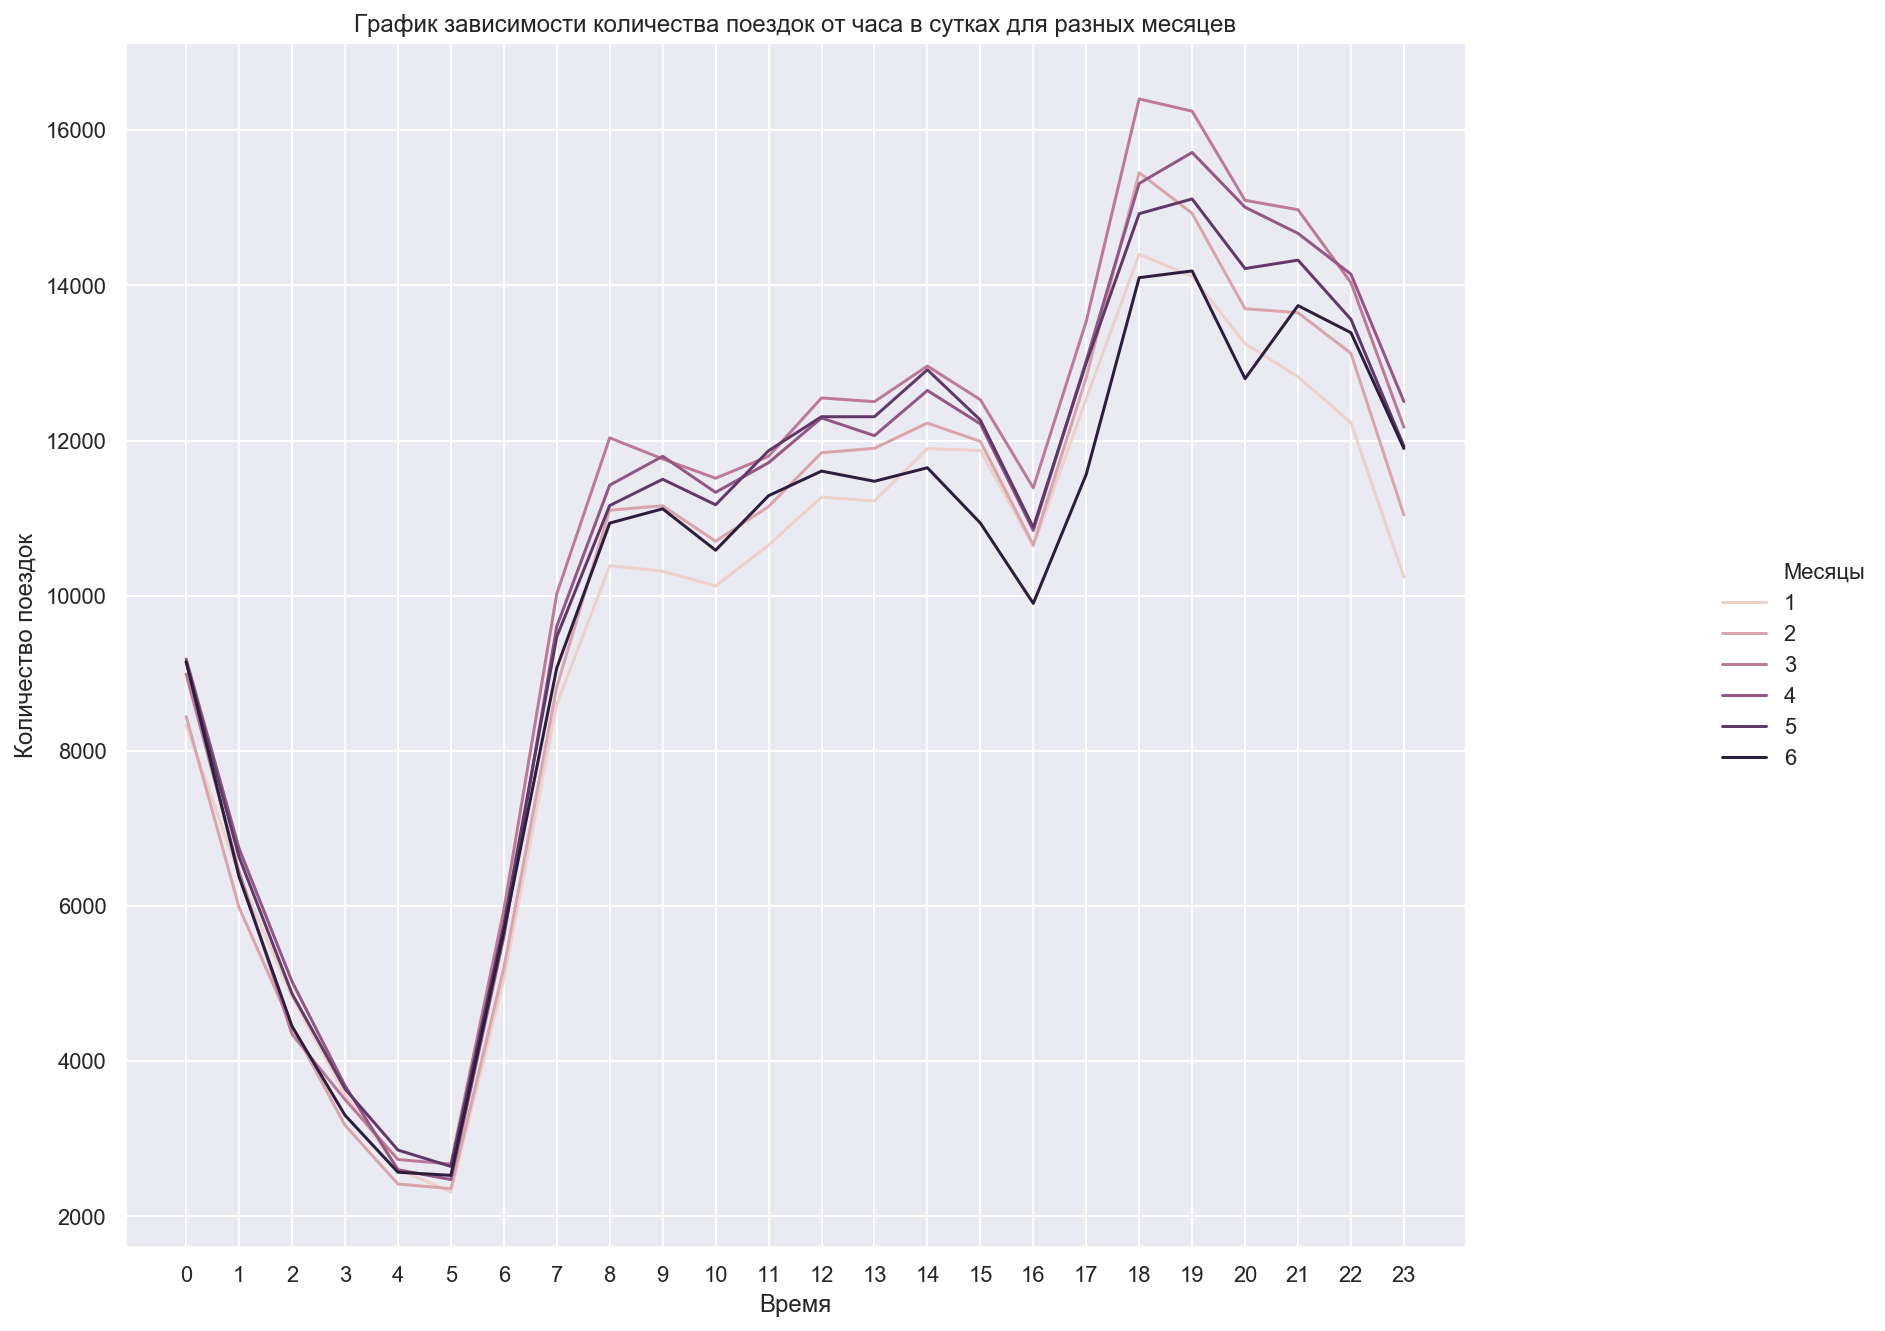

In [422]:
data['hour'] = data['pickup_datetime'].dt.hour
data['month'] = data['pickup_datetime'].dt.month
tmp = data.groupby(by = ['hour', 'month']).count()[['id']]
tmp.reset_index(inplace = True)
tmp.rename(columns = {'id' : 'Количество поездок', 'hour' : 'Время', 'month' : 'Месяцы'}, inplace=True)
plot = sns.relplot(data = tmp, x = 'Время', y = 'Количество поездок',
                    hue = 'Месяцы', kind = "line", legend = 'full')
plt.xticks(list(set(tmp['Время'].values)))
plt.title('График зависимости количества поездок от часа в сутках для разных месяцев')
plot.fig.set_size_inches(15, 10)

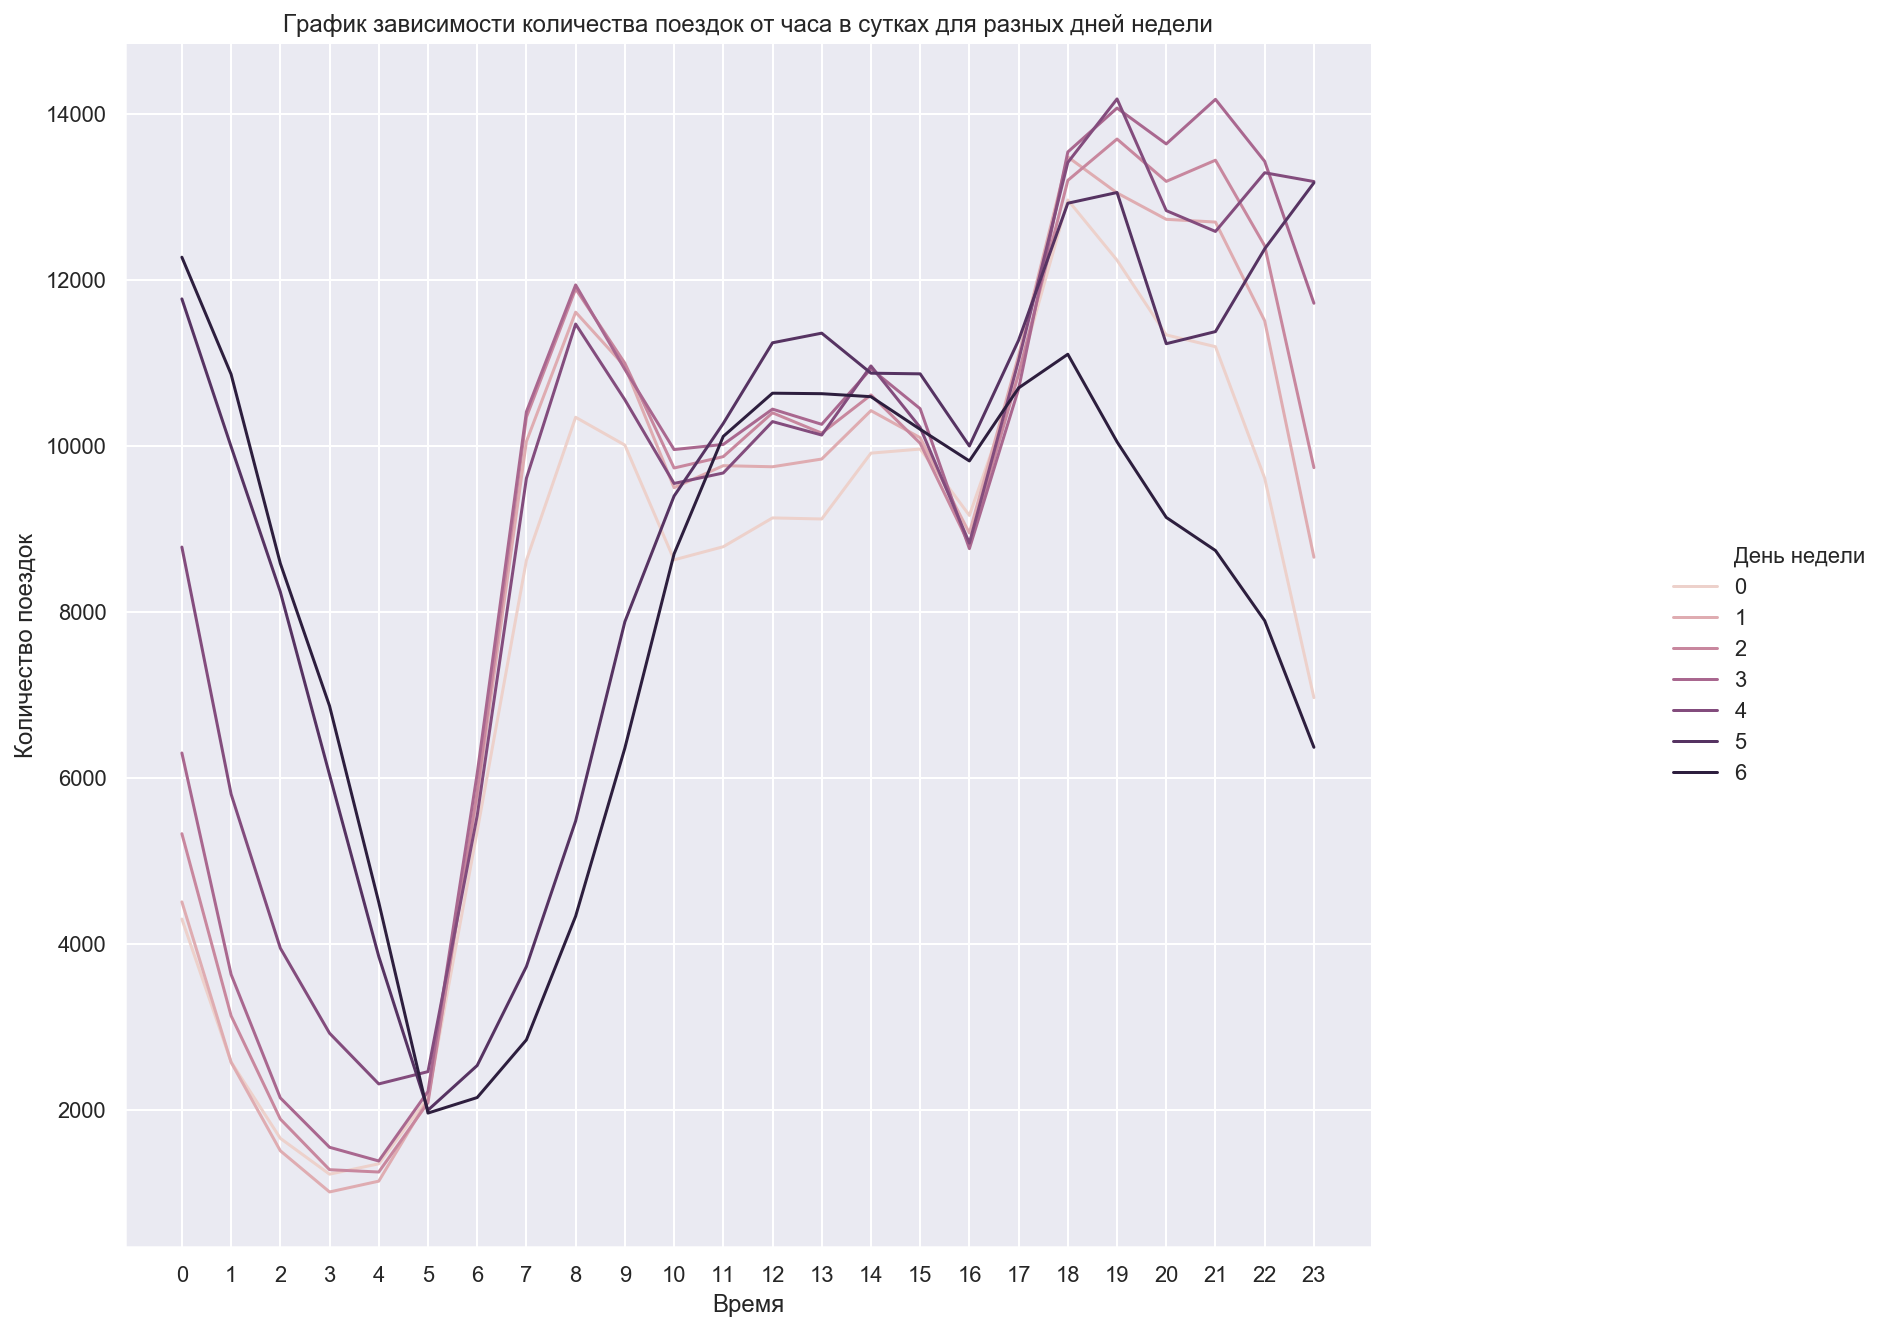

In [423]:
data['hour'] = data['pickup_datetime'].dt.hour
data['weekday'] = data['pickup_datetime'].dt.dayofweek
tmp = data.groupby(by = ['hour', 'weekday']).count()[['id']]
tmp.reset_index(inplace = True)
tmp.rename(columns = {'id' : 'Количество поездок', 'hour' : 'Время', 'weekday' : 'День недели'}, inplace=True)
plot = sns.relplot(data = tmp, x = 'Время', y = 'Количество поездок',
                    hue = 'День недели', kind = "line", legend = 'full')
plt.xticks(list(set(tmp['Время'].values)))
plt.title('График зависимости количества поездок от часа в сутках для разных дней недели')
plot.fig.set_size_inches(15, 10)

**Вопрос**: Какие выводы можно сделать, основываясь на графиках выше? Выделяются ли какие-нибудь дни недели? Месяца? Время суток? С чем это связано?

**Ответ**: Из месяцов немного выделяется январь, возможно, из-за снегопада возникают проблемы с движенем машин, поэтому людям выгоднее передвегаться на метро. Среди дней недели выделяется промежуток с четверга по субботу. Это может быть связанно с окончанием рабочей недели, люди после работы отдыхают где-то, поэтому им комфортнее передвигаться на такси(сесть за руль собственной машин для некоторых людей было бы запрещано). Самая низкая активность наблюдается с 3 до 5 ночи, так как большенство людей спят в это время. 

**Задание 4 (0.5 баллов)**. Разбейте выборку на обучающую и тестовую в отношении 7:3. По обучающей выборке нарисуйте график зависимости среднего логарифма времени поездки от дня недели. Затем сделайте то же самое, но для часа в сутках и дня в году.

In [424]:
Y = data['log_trip_duration']
X = data.drop(columns=['log_trip_duration'])
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=44)

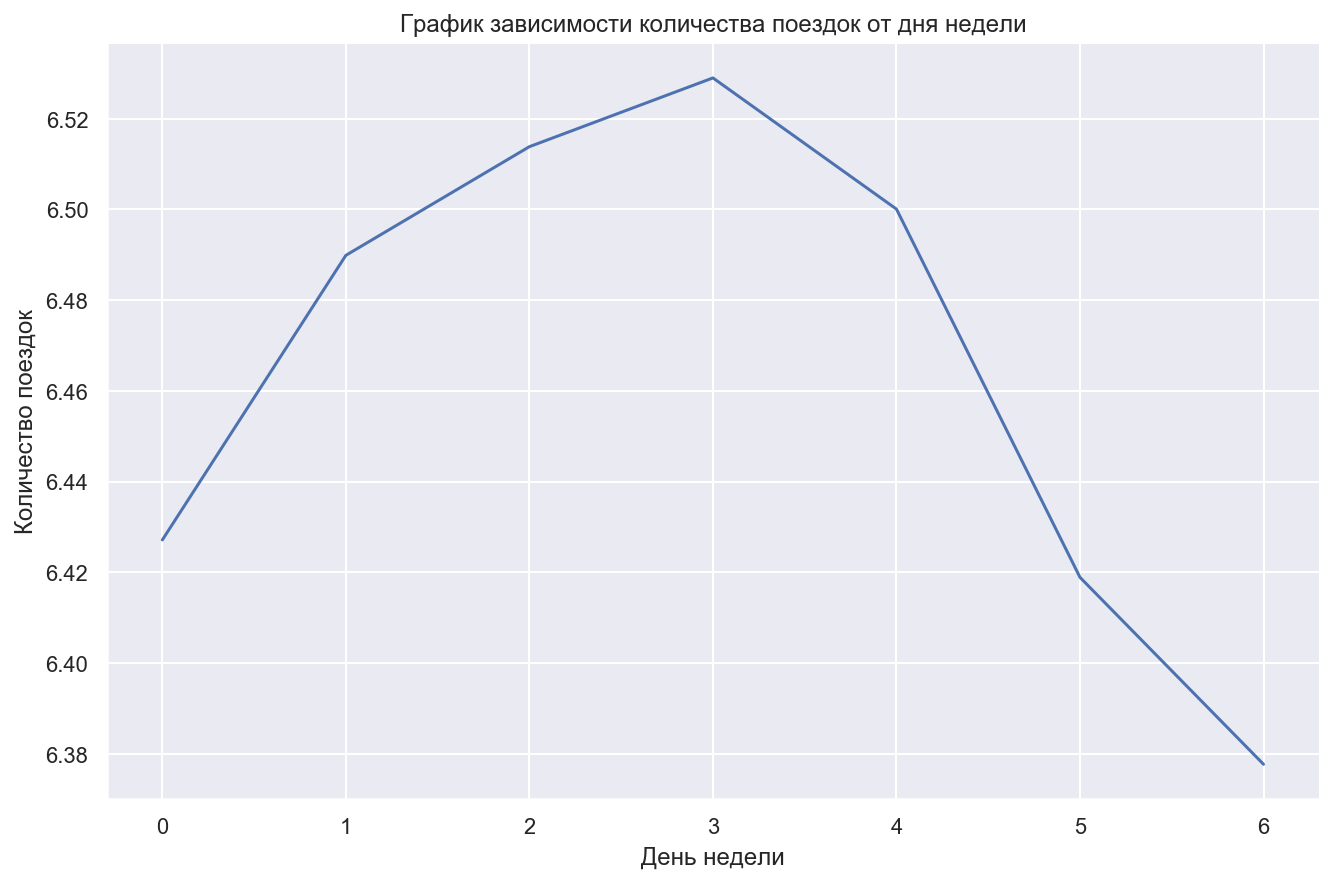

In [425]:
log_day = data.groupby(X_train['pickup_datetime'].dt.dayofweek).mean()['log_trip_duration']
plot = sns.relplot(data = log_day, kind = 'line')
plt.title('График зависимости количества поездок от дня недели')
plt.ylabel('Количество поездок')
plt.xlabel('День недели')
plot.fig.set_size_inches(10, 6)

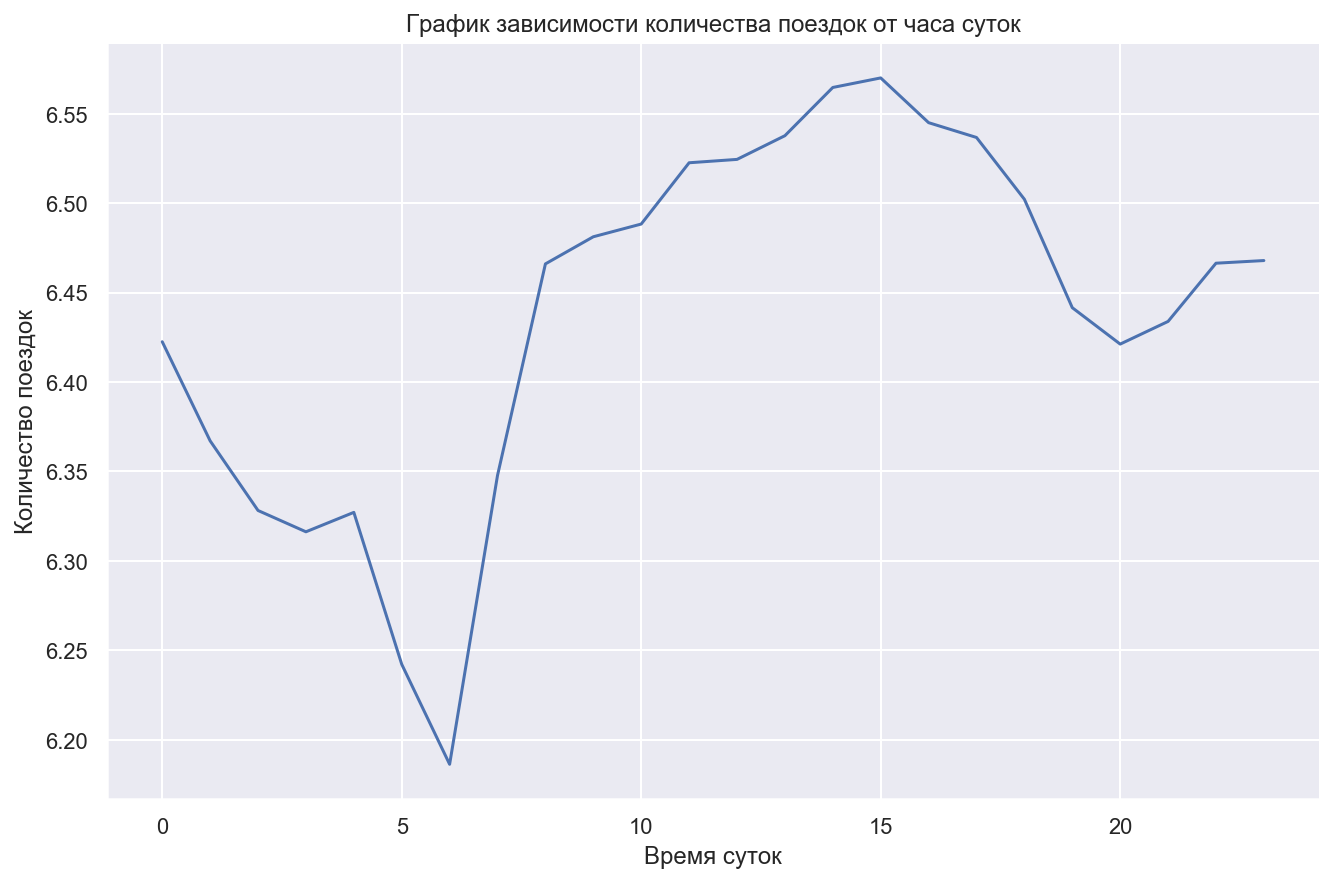

In [426]:
log_hour = data.groupby(X_train['pickup_datetime'].dt.hour).mean()['log_trip_duration']
plot = sns.relplot(data = log_hour, kind = 'line')
plt.title('График зависимости количества поездок от часа суток')
plt.ylabel('Количество поездок')
plt.xlabel('Время суток')
plot.fig.set_size_inches(10, 6)

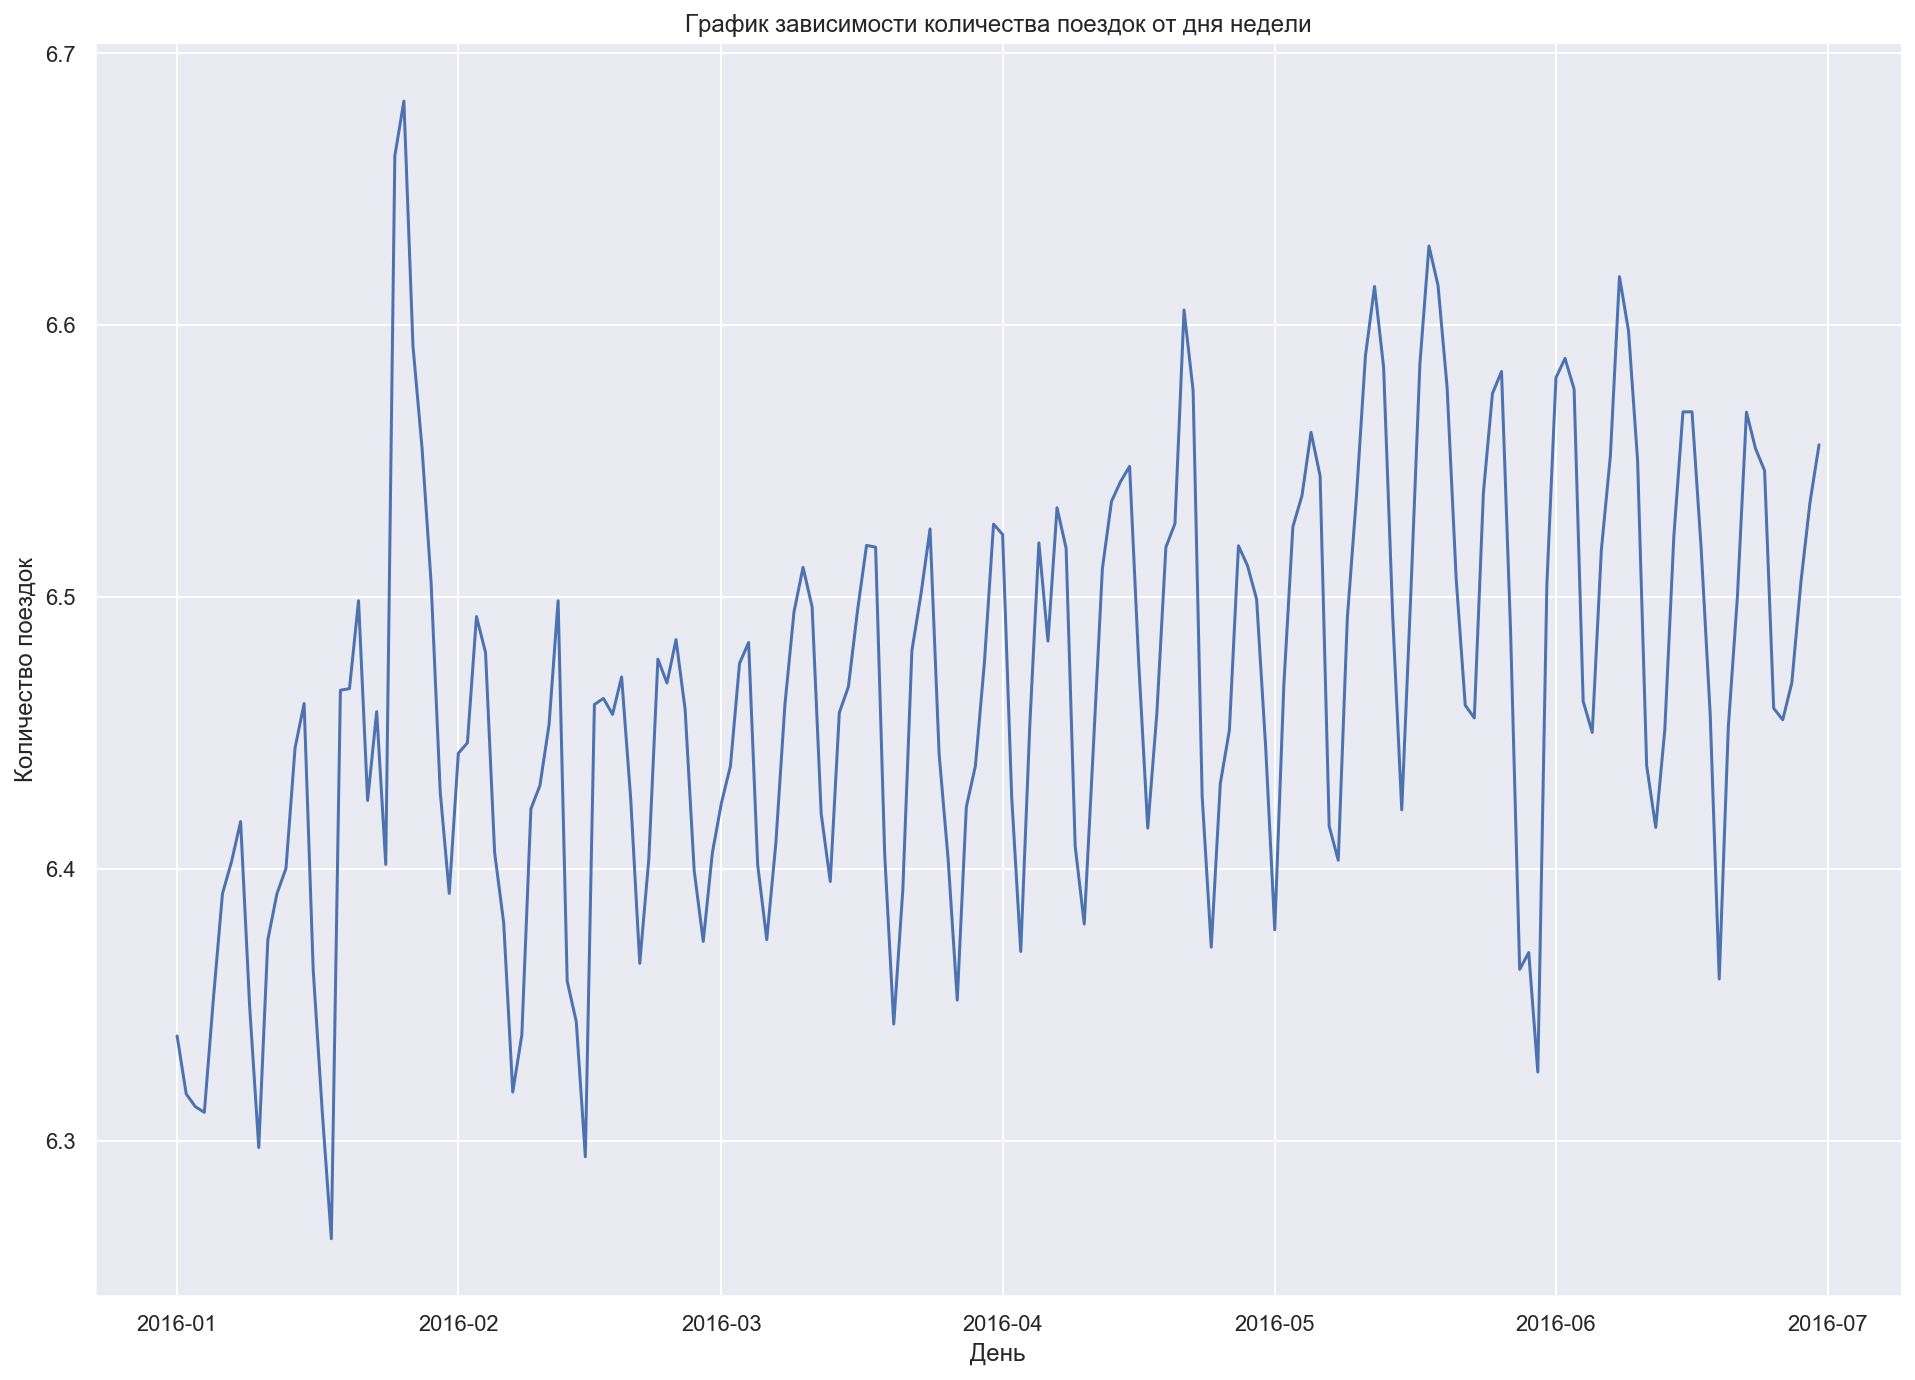

In [427]:
log_year = data.groupby(X_train['pickup_datetime'].dt.date).mean()['log_trip_duration']
plot = sns.relplot(data = log_year, kind = 'line')
plt.title('График зависимости количества поездок от дня недели')
plt.ylabel('Количество поездок')
plt.xlabel('День')
plot.fig.set_size_inches(15, 10)

**Вопрос**: Похожи ли графики зависимости таргета от дня недели и от часа в сутках на аналогичные графики для количества поездок? Почему? Что происходит со средним таргетом в те два аномальных периода, что мы видели выше? Почему так происходит? Наблюдаете ли вы какой-нибудь тренд на графике зависимости `log_trip_duration` от номера дня в году?

**Ответ**:

Похожи, тк среднее стремится к матожиданию, чем больше поездок

Во время первого аномального периода поездок мало, поэтому должно быть отклонение, но при этом сильные пробки,
из-за которых время увеличивается, поэтому среднее значение не сильно ушло от матожидания. Во время memorial day средний таргет ведет себя так
всвязи с низким количеством поездок

Можно заметить тред роста log_trip_duration от номера дня в году

Добавьте следующие признаки на основе `pickup_datetime`:
1. День недели
2. Месяц
3. Час
4. Является ли период аномальным (два бинарных признака, соответствующие двум аномальным периодам)
5. Номер дня в году

День недели(weekday), месяц(month), час(hour) были добавлены ранее 

In [428]:
data['number_day_year'] = data['pickup_datetime'].dt.dayofyear
data['anom'] = 0
data.loc[(data['pickup_datetime'].dt.day == 23) & (data['pickup_datetime'].dt.month == 1), 'anom'] = 1
data.loc[(data['pickup_datetime'].dt.day == 24) & (data['pickup_datetime'].dt.month == 1), 'anom'] = 1
data.loc[(data['pickup_datetime'].dt.day == 30) & (data['pickup_datetime'].dt.month == 5), 'anom'] = 1
data[data['anom'] == 1]

,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,log_trip_duration,hour,month,weekday,number_day_year,anom
310,id1027675,2,2016-01-23 08:46:42,1,-73.969536,40.755219,-73.976524,40.747948,N,7.088409,8,1,5,23,1
481,id3105640,1,2016-01-24 20:35:19,1,-73.977982,40.684780,-73.954132,40.613346,N,7.338238,20,1,6,24,1
593,id2657420,1,2016-01-23 00:06:25,1,-73.982101,40.745903,-73.993843,40.683250,N,7.163172,0,1,5,23,1
731,id0556653,2,2016-05-30 13:33:07,2,-74.000748,40.718281,-73.996140,40.690948,N,6.167516,13,5,0,151,1
794,id3382236,2,2016-01-23 10:38:43,5,-73.975281,40.760990,-73.963181,40.767761,N,5.808142,10,1,5,23,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1458150,id2588416,1,2016-05-30 16:28:41,1,-73.971672,40.757324,-73.976402,40.750854,N,4.955827,16,5,0,151,1
1458160,id2186320,1,2016-01-24 16:35:21,2,-73.970299,40.788933,-74.011162,40.710899,N,7.386471,16,1,6,24,1
1458575,id0420075,2,2016-05-30 03:52:41,1,-74.003891,40.751667,-74.001350,40.746571,N,5.332719,3,5,0,151,1
1458602,id2089150,1,2016-05-30 14:42:12,1,-74.015457,40.708027,-74.015396,40.708138,N,3.295837,14,5,0,151,1


Итак, мы уже создали некоторое количество признаков.

**Вопрос**: Какие из признаков стоит рассматривать как категориальные, а какие - как численные? Почему?

**Числовые**: час(hour), номер дня(number_day_year), тк их значения можно сравнить

**Категориальные**: день недели(weekday), месяц(month), тк нельзя сравнить название дней недели или месяцов

Аномалию(anom) скорее можно отнести к **бинарным** признакам

**Задание 5 (0.75 баллов)**. Обучите `Ridge`-регрессию с параметрами по умолчанию, закодировав все категориальные признаки с помощью `OneHotEncoder`. Численные признаки отмасштабируйте с помощью `StandardScaler`. Используйте только признаки, которые мы выделили в этой части задания.

Лучше не перезапускайте, очень долго работает

In [431]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

numeric_data = X_train.select_dtypes([np.number])
numeric_features = numeric_data.columns
numeric_data_mean = numeric_data.mean()
X_train = X_train.fillna(numeric_data_mean)
X_test = X_test.fillna(numeric_data_mean)

categorical = list(X_train.dtypes[X_train.dtypes == "object"].index)
X_train[categorical] = X_train[categorical].fillna("NotGiven")
X_test[categorical] = X_test[categorical].fillna("NotGiven")

transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown="ignore"), categorical),
    ('scaling', StandardScaler(), numeric_features)
])

pipeline = Pipeline(steps = [
    ('ohe_and_scaling', transformer),
    ('regression', Ridge())
])

model = pipeline.fit(X_train, Y_train)


Y_pred = model.predict(X_train)
Y_pred_test = model.predict(X_test)

print("Train RMLSE = %.4f" % mean_squared_error(Y_train, Y_pred))
print("Test RMLSE = %.4f" % mean_squared_error(Y_test, Y_pred_test))

Train RMLSE = 0.6057
Test RMLSE = 0.6039


## Часть 2. Изучаем координаты (3 балла)
Мы уже очень хорошо изучили данные о времени начала поездки, давайте теперь посмотрим на информацию о координатах начала и конца поездки. Мы подготовили для вас функцию, которая на карте рисует точки начала или конца поездки. Примеры ее вызова вы найдете ниже. Обратите внимание, что в эту функцию мы передаем лишь небольшой кусочек данных, посколько иначе функция будет работать очень долго

In [433]:
def show_circles_on_map(data, latitude_column, longitude_column, color):
    """
    The function draws map with circles on it.
    The center of the map is the mean of coordinates passed in data.
    
    data: DataFrame that contains columns latitude_column and longitude_column
    latitude_column: string, the name of column for latitude coordinates
    longitude_column: string, the name of column for longitude coordinates
    color: string, the color of circles to be drawn
    """

    location = (data[latitude_column].mean(), data[longitude_column].mean())
    m = folium.Map(location=location)

    for _, row in data.iterrows():
        folium.Circle(
            radius=100,
            location=(row[latitude_column], row[longitude_column]),
            color=color,
            fill_color=color,
            fill=True
        ).add_to(m)

    return m

In [434]:
show_circles_on_map(data.sample(1000), "pickup_latitude", "pickup_longitude", "blue")

In [435]:
show_circles_on_map(data.sample(1000), "dropoff_latitude", "dropoff_longitude", "blue")

**Вопрос**: Какие две точки выделяются на карте?

Аэропорты

**Задание 6 (0.75 балл)**. Как мы все прекрасно помним, $t = s / v_{\text{ср}}$, поэтому очевидно, что самым сильным признаком будет расстояние, которое необходимо проехать. Мы не можем посчитать точное расстояние, которое необходимо преодолеть такси, но мы можем его оценить, посчитав кратчайшее расстояние между точками начала и конца поездки. Чтобы корректно посчитать расстояние между двумя точками на Земле, можно использовать функцию `haversine`. Также можно воспользоваться кодом с первого семинара. Посчитайте кратчайшее расстояние для объектов и запишите его в колонку `haversine`:

In [436]:
!pip install haversine

In [437]:
def haversine_array(lat1, lng1, lat2, lng2):
    lat1, lng1, lat2, lng2 = map(np.radians, (lat1, lng1, lat2, lng2))
    AVG_EARTH_RADIUS = 6371
    lat = lat2 - lat1
    lng = lng2 - lng1
    d = np.sin(lat * 0.5) ** 2 + np.cos(lat1) * np.cos(lat2) * np.sin(lng * 0.5) ** 2
    h = 2 * AVG_EARTH_RADIUS * np.arcsin(np.sqrt(d))
    return h

In [438]:
data['haversine'] = haversine_array(
    data['pickup_latitude'], data['pickup_longitude'], 
    data['dropoff_latitude'], data['dropoff_longitude']
)

Так как мы предсказываем логарифм времени поездки и хотим, чтобы наши признаки были линейно зависимы с этой целевой переменной, нам нужно логарифмировать расстояние: $\log t = \log s - \log{v_{\text{ср}}}$. Запишите логарифм `haversine` в отдельную колонку:

In [439]:
data['log_haversine'] = np.log1p(data['haversine'])

Убедимся, что логарифм расстояния лучше коррелирует с нашим таргетом, чем просто расстояние:

In [440]:
data['log_haversine'].corr(data['log_trip_duration']) > data['haversine'].corr(data['log_trip_duration'])

True

**Задание 7 (0.75 балла)**. Давайте изучим среднюю скорость движения такси. Посчитайте среднюю скорость для каждого объекта обучающей выборки, разделив `haversine` на `trip_duration`, и нарисуйте гистограмму ее распределения

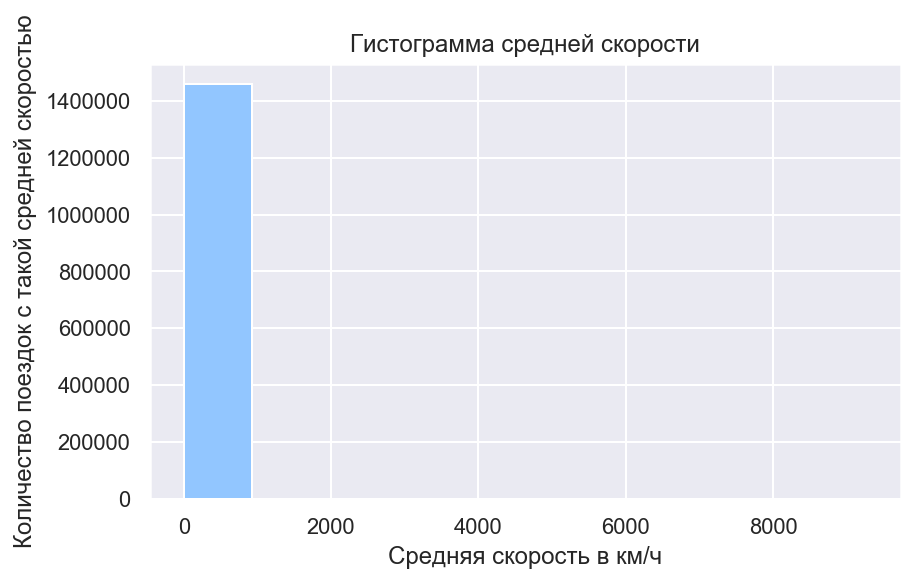

In [464]:
data['av_speed'] = data['haversine'] / trip_duration * 3600

plt.xlabel('Средняя скорость в км/ч')
plt.ylabel('Количество поездок с такой средней скоростью')
plt.title('Гистограмма средней скорости')
plt.hist(data['av_speed'])
plt.show()

Как можно видеть по гистограмме, для некоторых объектов у нас получились очень больше значения скоростей. Нарисуйте гистограмму по объектам, для которых значение скорости получилось разумным (например, можно не включать рассмотрение объекты, где скорость больше некоторой квантили):

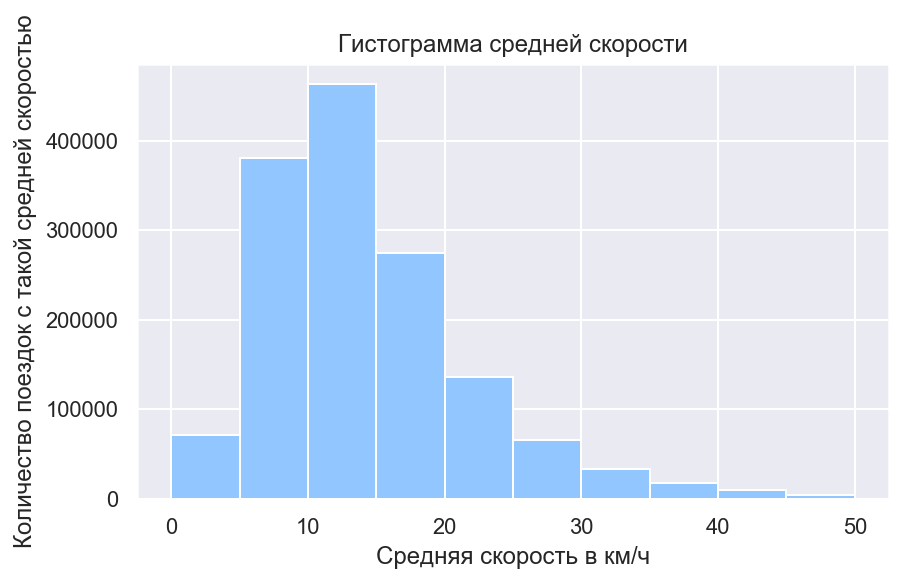

In [465]:
plt.xlabel('Средняя скорость в км/ч')
plt.ylabel('Количество поездок с такой средней скоростью')
plt.title('Гистограмма средней скорости')
plt.hist(data['av_speed'], range = (0, 50))
plt.show()

Для каждой пары (день недели, час суток) посчитайте медиану скоростей. Нарисуйте с помощью `sns.heatmap` график, где по осям будут дни недели и часы, а в качестве значения функции - медиана скорости

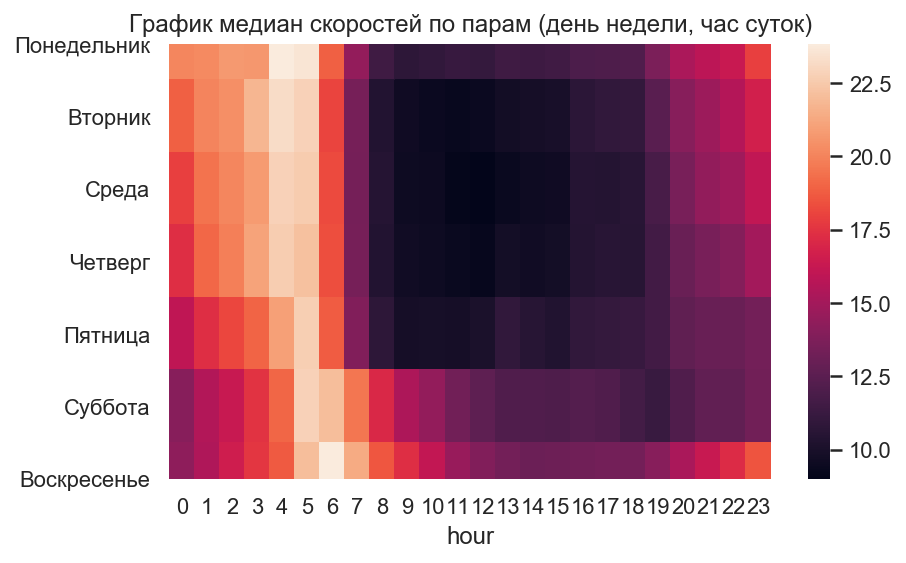

In [460]:
mspeeds = data.groupby(by = ['weekday', 'hour']).median()[['av_speed']]
tmp = mspeeds.reset_index()
tmp2 = tmp.pivot(index = 'weekday', columns = 'hour', values = 'av_speed')
tmp2.index = week
plt.title('График медиан скоростей по парам (день недели, час суток)')
ax = sns.heatmap(tmp2)

Не забудьте удалить колонку со значением скорости из данных!

**Вопрос**: Почему значение скорости нельзя использовать во время обучения?

Нам нужно предсказывать время, а как известно скорость это отношение расстояния на время

In [462]:
data.drop(columns = ['av_speed'], axis=1, inplace=True)

**Вопрос**: Посмотрите внимательно на график и скажите, в какие моменты времени скорость минимальна; максимальна.


**Ответ**: В 6 в воскресенье и в понедельник в 4 максимальна, в пн-пт в период с 9 до 16 минимальна

Создайте признаки "поездка совершается в период пробок" и "поездка совершается в период свободных дорог" (естественно, они не должен зависеть от скорости!):

In [463]:
data['traffic'] = 0
data.loc[(data['pickup_datetime'].dt.hour >= 9) & (data['pickup_datetime'].dt.hour <= 16) & 
         (data['pickup_datetime'].dt.dayofweek >= 0) & (data['pickup_datetime'].dt.dayofweek <= 5), 'traffic'] = 1
data[data['traffic'] == 1]

,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,log_trip_duration,hour,month,weekday,number_day_year,anom,haversine,log_haversine,speed_av,traffic
2,id3858529,2,2016-01-19 11:35:24,1,-73.979027,40.763939,-74.005333,40.710087,N,7.661527,11,1,1,19,0,6.385098,1.999464,10.822201,1
4,id2181028,2,2016-03-26 13:30:55,1,-73.973053,40.793209,-73.972923,40.782520,N,6.077642,13,3,5,86,0,1.188588,0.783257,9.836594,1
12,id1187965,2,2016-02-19 09:52:46,2,-73.962982,40.756680,-73.984406,40.760719,N,7.016610,9,2,4,50,0,1.859483,1.050641,6.009101,1
15,id3319787,1,2016-05-16 15:29:02,1,-73.955513,40.768593,-73.948761,40.771545,N,5.356586,15,5,0,137,0,0.656578,0.504754,11.202279,1
18,id3552682,1,2016-06-27 09:55:13,1,-74.003983,40.713013,-73.979195,40.749924,N,7.183871,9,6,0,179,0,4.605201,1.723695,12.588249,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1458635,id3027038,2,2016-05-19 14:46:55,1,-73.985390,40.763020,-73.989708,40.767502,N,5.472271,14,5,3,140,0,0.616982,0.480561,9.371876,1
1458636,id0405770,2,2016-02-12 10:13:06,1,-73.863815,40.769684,-73.864395,40.761326,N,6.685861,10,2,4,43,0,0.930649,0.657856,4.187922,1
1458639,id2376096,2,2016-04-08 13:31:04,4,-73.982201,40.745522,-73.994911,40.740170,N,6.658011,13,4,4,99,0,1.225080,0.799793,5.668751,1
1458642,id2714485,1,2016-01-05 15:56:26,1,-73.982079,40.749062,-73.974632,40.757107,N,5.924256,15,1,1,5,0,1.092564,0.738390,10.544853,1


## Часть 3. Изучаем оставшиеся признаки (1 балл)

**Задание 11 (0.75 баллов)**. У нас осталось еще 3 признака, которые мы не исследовали: `vendor_id`, `passenger_count` и `store_and_fwd_flag`.

**Вопрос**: Подумайте, почему каждый из этих признаков может быть потенциально полезным.

Посчитайте, сколько есть уникальных значений у каждого из этих признаков:

In [472]:
print('vendor_id =', data['vendor_id'].unique().shape[0])
print('passenger_count =', data['passenger_count'].unique().shape[0])
print('store_and_fwd_flag =', data['store_and_fwd_flag'].unique().shape[0])

vendor_id = 2
passenger_count = 10
store_and_fwd_flag = 2


Постройте "ящики с усами" распределений логарифма времени поездки в зависимости от значений каждого из признаков

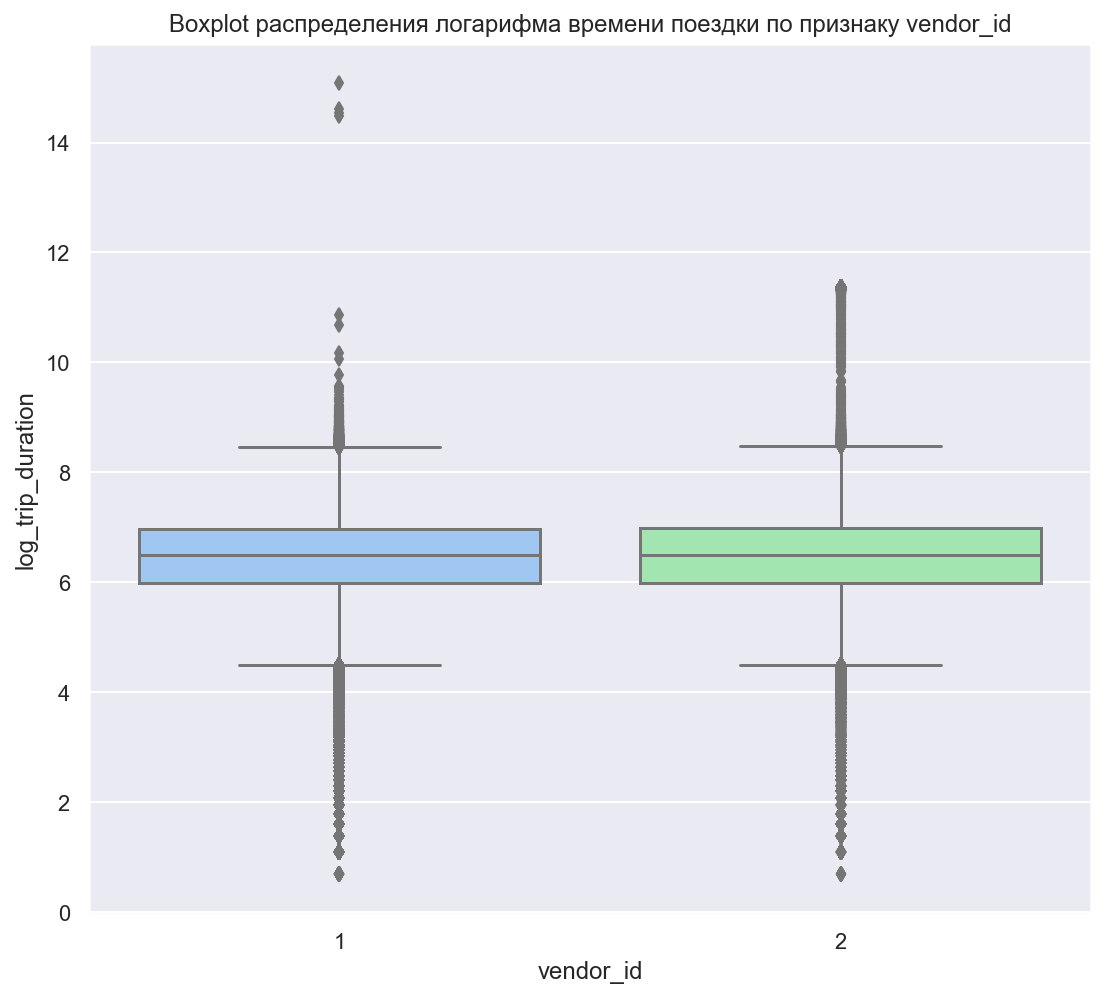

In [475]:
plt.figure(figsize=(8, 8))
plt.title('Boxplot распределения логарифма времени поездки по признаку vendor_id')
boxplt = sns.boxplot(y = data['log_trip_duration'], x = data['vendor_id'])

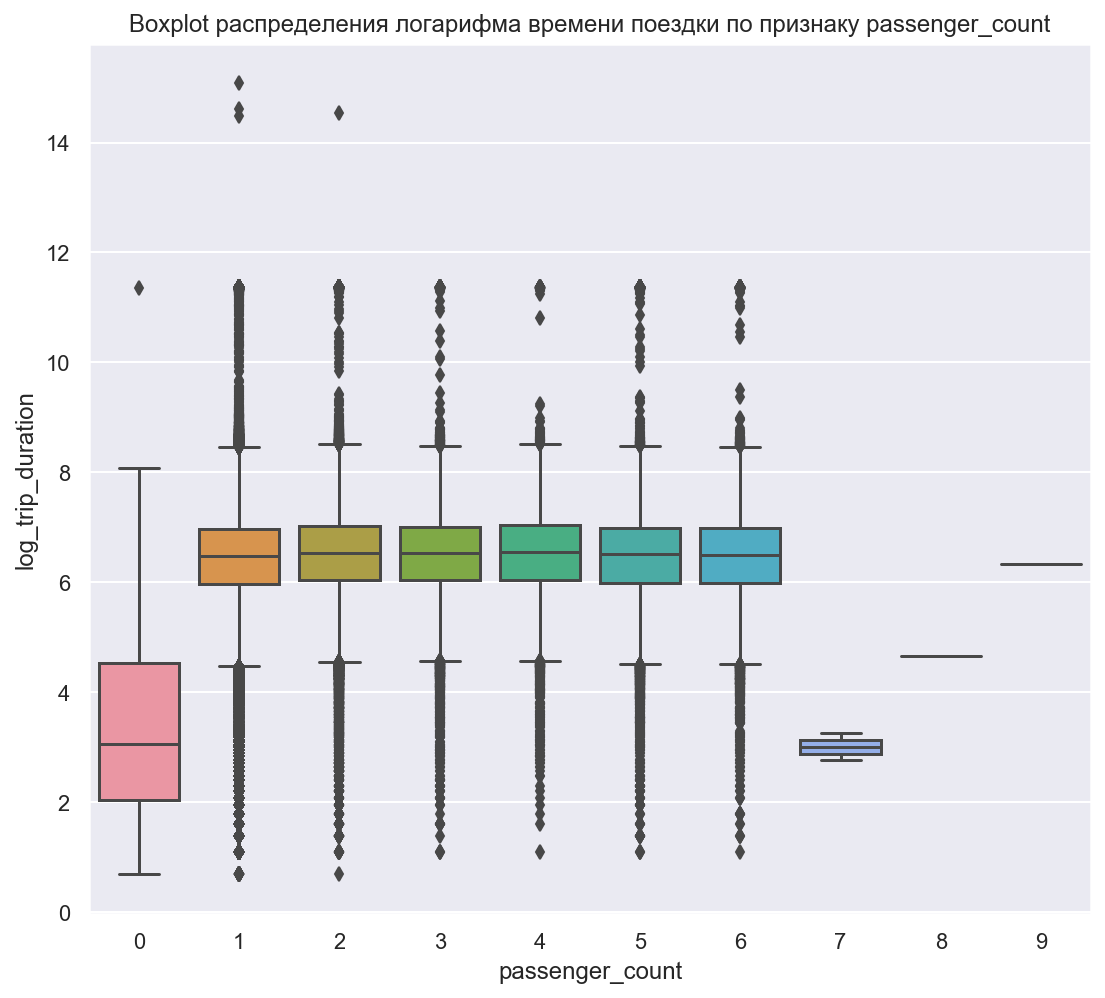

In [476]:
plt.figure(figsize=(8, 8))
plt.title('Boxplot распределения логарифма времени поездки по признаку passenger_count')
boxplt = sns.boxplot(y = data['log_trip_duration'], x = data['passenger_count'])

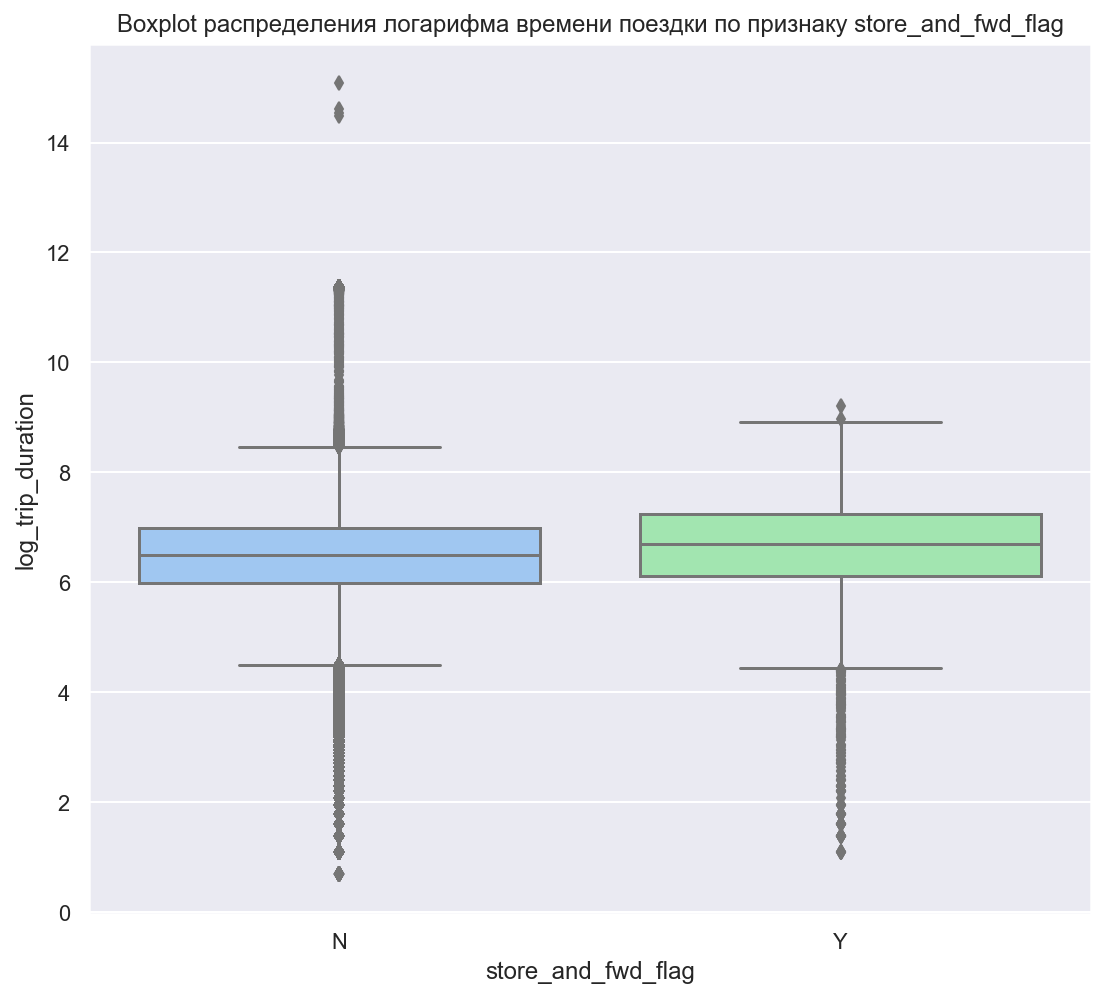

In [477]:
plt.figure(figsize=(8, 8))
plt.title('Boxplot распределения логарифма времени поездки по признаку store_and_fwd_flag')
boxplt = sns.boxplot(y = data['log_trip_duration'], x = data['store_and_fwd_flag'])

Переведите признаки `vendor_id` и `store_and_fwd_flag` в значения $\{0;1\}$

In [479]:
data['vendor_id'].replace([1, 2], [0, 1], inplace=True)
data['store_and_fwd_flag'].replace(['N', 'Y'], [0, 1], inplace=True)

**Вопрос**: Основываясь на графиках выше, как вы думаете, будут ли эти признаки сильными?

**Ответ**: нет, так как log_trip_duration везде примерно одинаковый